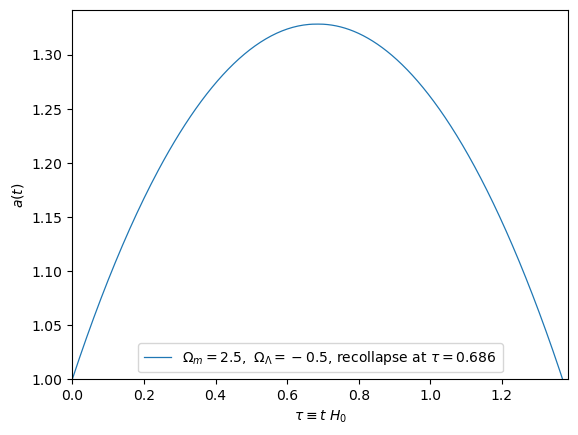

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义演化方程
def da_dtau(tau, a, Omega_m, Omega_Lambda):
    term1 = Omega_Lambda * (a**2 - 1)
    term2 = Omega_m * (a**(-1) - 1)
    term3 = 1
    if term1 + term2 + term3 >= 0:
        result = np.sqrt(term1 + term2 + term3)
    else:
        result = 0
    return result  # 取绝对值避免复数
def da_dtau1(tau, a, Omega_m, Omega_Lambda):
    term1 = Omega_Lambda * (a**2 - 1)
    term2 = Omega_m * (a**(-1) - 1)
    term3 = 1
    return -np.sqrt(abs(term1 + term2 + term3))

# 初始条件
a0 = 1 
tau_span = (0, 5)  # 无量纲时间范围
tau_eval = np.linspace(0, 5, 1000)  # 时间点

# 参数设置
Omega_m = 2.5  # 物质密度参数
Omega_Lambda = -0.5  # 暗能量密度参数

# 求解微分方程
sol = solve_ivp(
    da_dtau,
    tau_span,
    [a0],
    args=(Omega_m, Omega_Lambda),
    t_eval=tau_eval,
    method='RK45',  # 使用 Runge-Kutta 方法
    rtol=1e-8,  # 相对误差容限
    atol=1e-8,  # 绝对误差容限
)

# 提取结果
tau = sol.t
a = sol.y[0]

# 找到 a 的最大值位置
max_index = np.argmax(a)
tau_max = tau[max_index]
a_max = a[max_index]

# 反向积分
tau_reverse = np.linspace(tau_max, tau_max*2, 1000)  # 从 tau_max 反向积分到 0
sol_reverse = solve_ivp(
    da_dtau1,
    (tau_max, tau_max*2),
    [a_max],
    args=(Omega_m, Omega_Lambda),
    t_eval=tau_reverse,
    method='RK45',
    rtol=1e-8,
    atol=1e-8,
)

# 合并正向和反向结果
tau_combined = np.concatenate((tau[:max_index], sol_reverse.t))
a_combined = np.concatenate((a[:max_index], sol_reverse.y[0]))

# 绘制结果
plt.plot(tau_combined, a_combined, linewidth = 0.9, label=r'$\Omega_{m}=2.5,\ \Omega_{\Lambda}=-0.5$, recollapse at $\tau=0.686$')
plt.xlim(0, 1.01*tau_combined[-1])
plt.ylim(1, 1.01*max(a_combined))
plt.xlabel(r'$\tau\equiv t\ H_{0}$')
plt.ylabel(r'$a(t)$')
plt.legend()
#plt.savefig('/Users/zengyuhe/academic_doc/Classes/Cosmology/calculation/recollapse.pdf')
plt.show()

In [2]:
tau_max

0.6856856856856857